<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/%E0%B9%8AUsecase_DeepLearning_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
image_dir = Path('/content/drive/MyDrive/Coding&AI-DS101-material/imageprocessing/')
image_dir

PosixPath('/content/drive/MyDrive/Coding&AI-DS101-material/imageprocessing')

In [ ]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
image_df

,Filepath,Label
0,/content/drive/MyDrive/Coding&AI-DS101-materia...,healthy
1,/content/drive/MyDrive/Coding&AI-DS101-materia...,healthy
2,/content/drive/MyDrive/Coding&AI-DS101-materia...,healthy
3,/content/drive/MyDrive/Coding&AI-DS101-materia...,healthy
4,/content/drive/MyDrive/Coding&AI-DS101-materia...,healthy
...,...,...
1203,/content/drive/MyDrive/Coding&AI-DS101-materia...,leaf_spot
1204,/content/drive/MyDrive/Coding&AI-DS101-materia...,leaf_spot
1205,/content/drive/MyDrive/Coding&AI-DS101-materia...,leaf_spot
1206,/content/drive/MyDrive/Coding&AI-DS101-materia...,leaf_spot


In [ ]:
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False

)

Found 773 validated image filenames belonging to 2 classes.
Found 193 validated image filenames belonging to 2 classes.
Found 242 validated image filenames belonging to 2 classes.


In [ ]:
from PIL import Image
import io

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
25/25 [==============================] - 289s 12s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 52s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 48s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 53s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 50s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 6/100
25/25 [==============================] - 55s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/100
25/25 [==============================] - 48s 2s/step -

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 32)                0     

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.69315
Test Accuracy: 50.00%


In [ ]:
predictions = (model.predict(test_images)>0.5).astype(np.int32)

7/7 [==============================] - 3s 339ms/step


In [ ]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
    

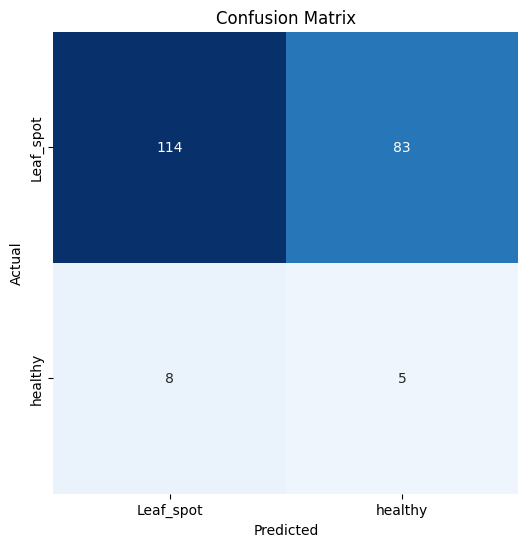

Classification Report:
----------------------
               precision    recall  f1-score   support

   Leaf_spot       0.93      0.58      0.71       197
     healthy       0.06      0.38      0.10        13

    accuracy                           0.57       210
   macro avg       0.50      0.48      0.41       210
weighted avg       0.88      0.57      0.68       210



In [ ]:
cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["Leaf_spot", "healthy"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Leaf_spot", "healthy"])
plt.yticks(ticks=[0.5, 1.5], labels=["Leaf_spot", "healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


In [ ]:
image_dir = Path('/content/drive/MyDrive/Coding&AI-DS101-material/imageprocessing/leaf_spot/unseen/')

In [ ]:
filepaths = list(image_dir.glob(r'**/*.JPG'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df_unseen = pd.concat([filepaths, labels], axis=1)
print(image_df_unseen)

                                            Filepath   Label
0  /content/drive/MyDrive/Coding&AI-DS101-materia...  unseen


In [ ]:
test_generator_unseen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
test_images_unseen = test_generator_unseen.flow_from_dataframe(
    dataframe=image_df_unseen,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32
)

Found 1 validated image filenames belonging to 1 classes.


In [ ]:
predictions_unseen = (model.predict(test_images_unseen)>0.5).astype(np.int32)
print(predictions_unseen)
if predictions_unseen == 0:
  print ("๋Healthy")
else:
  print ("Leafspot")

1/1 [==============================] - 0s 68ms/step
[[1]]
Leafspot


In [ ]:
# save model
model.save('/content/drive/MyDrive/Coding&AI-DS101-material/imageprocessing/plant_diease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
